<a href="https://colab.research.google.com/github/Eserhimas/Basics/blob/main/Numerical_variables_transforming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install feature-engine


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 2.9 MB/s eta 0:00:00


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [34]:
path = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

df = pd.read_csv(path)

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
def qqp (df, variable):
  
  plt.figure(figsize=(16,8))
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.show()

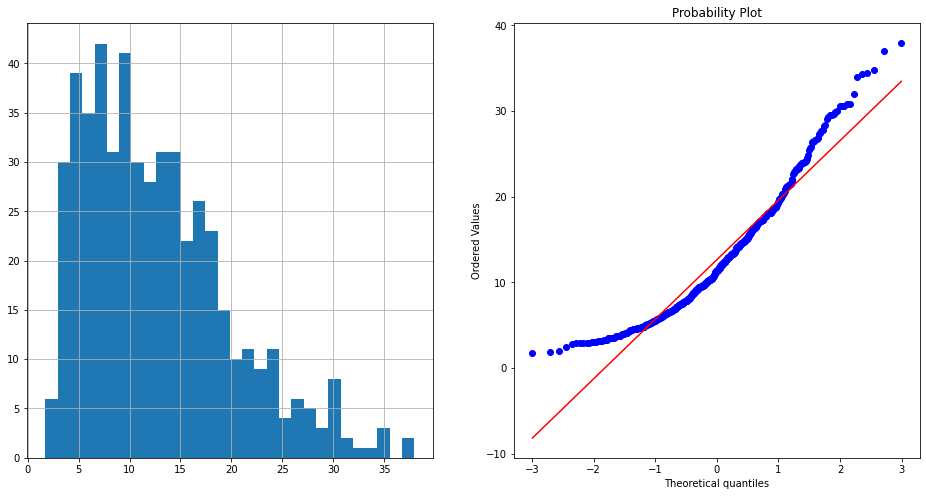

In [13]:
qqp(df, 'lstat')

lstat variable is not normally distributed.

**Transforming the Data**

In [18]:
data = df.copy() # to protect the original dataset

# transforming the data with numpy

data[['lstat', 'nox', 'dis', 'rm']] = np.log(df[['lstat', 'nox', 'dis', 'rm']])

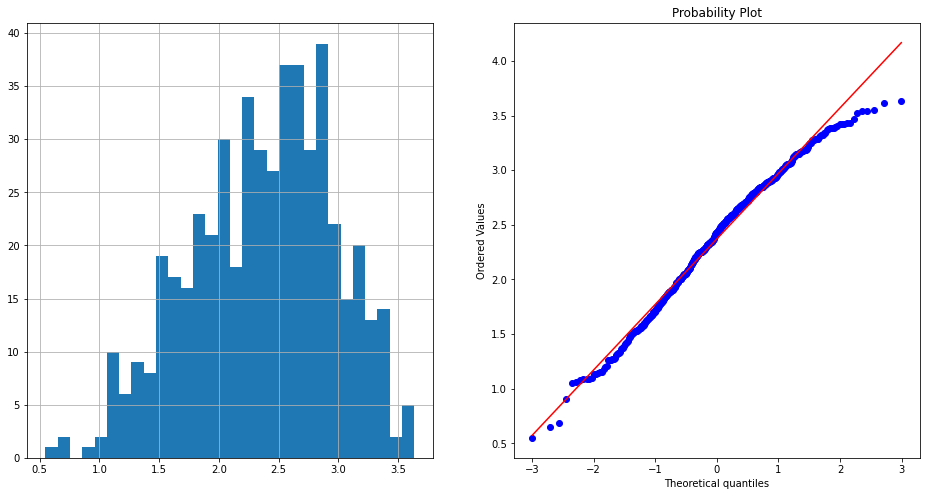

In [19]:
# checking the distribution with transformed variable
qqp(data, 'lstat')

In [20]:
# transforming with scikit-learn

trn = FunctionTransformer(np.log) # We don't need to fit FunctionTransformer since there are no parameters to be learned.

data = trn.transform(df[['lstat', 'nox', 'dis', 'rm']])

data = pd.DataFrame(data, columns=['lstat', 'nox', 'dis', 'rm'])


In [21]:
data

,lstat,nox,dis,rm
0,1.605430,-0.619897,1.408545,1.883275
1,2.212660,-0.757153,1.602836,1.859574
2,1.393766,-0.757153,1.602836,1.971996
3,1.078410,-0.780886,1.802073,1.945624
4,1.673351,-0.780886,1.802073,1.966693
...,...,...,...,...
501,2.269028,-0.556870,0.907694,1.886008
502,2.206074,-0.556870,0.827460,1.811562
503,1.729884,-0.556870,0.773574,1.942476
504,1.868721,-0.556870,0.870833,1.916040


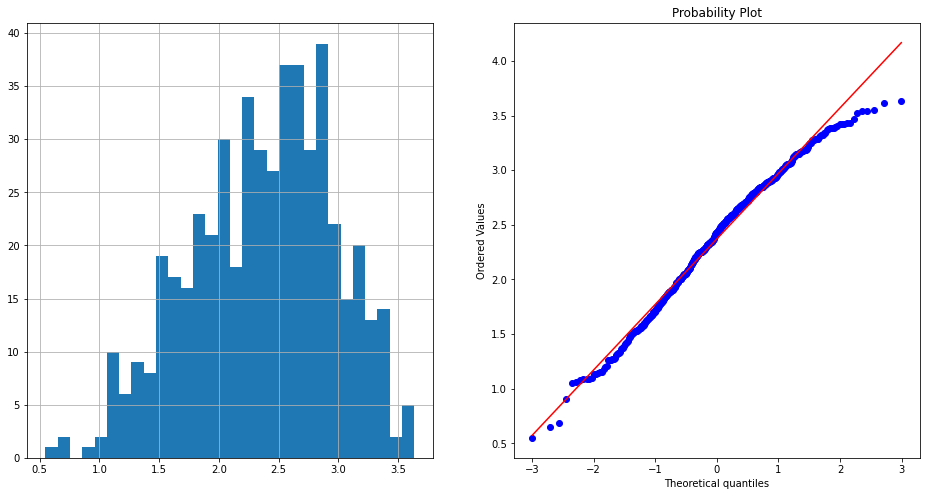

In [22]:
qqp(data, 'lstat')

**Reciprocal Function**

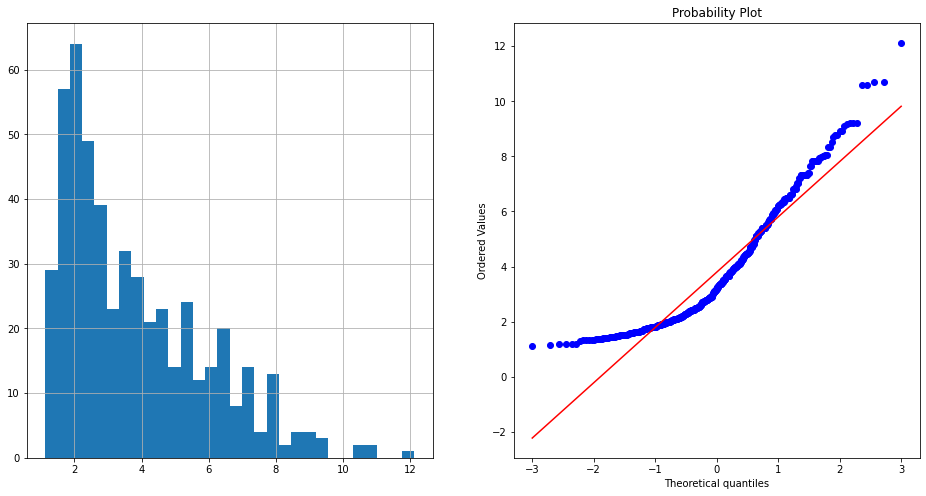

In [23]:
qqp(df, 'dis') # not normally distributed

In [24]:
data = df.copy()

In [27]:
data[['lstat', 'nox', 'dis', 'rm']] = np.reciprocal(df[['lstat', 'nox', 'dis', 'rm']])

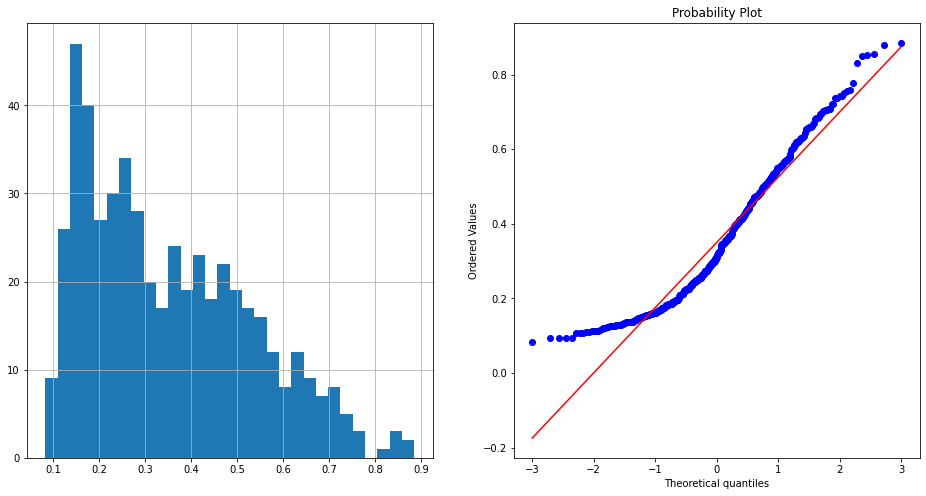

In [28]:
qqp(data, 'dis')

In [29]:
# Sklearn

trn = FunctionTransformer(np.reciprocal)

data = trn.transform(df[['lstat', 'nox', 'dis', 'rm']])

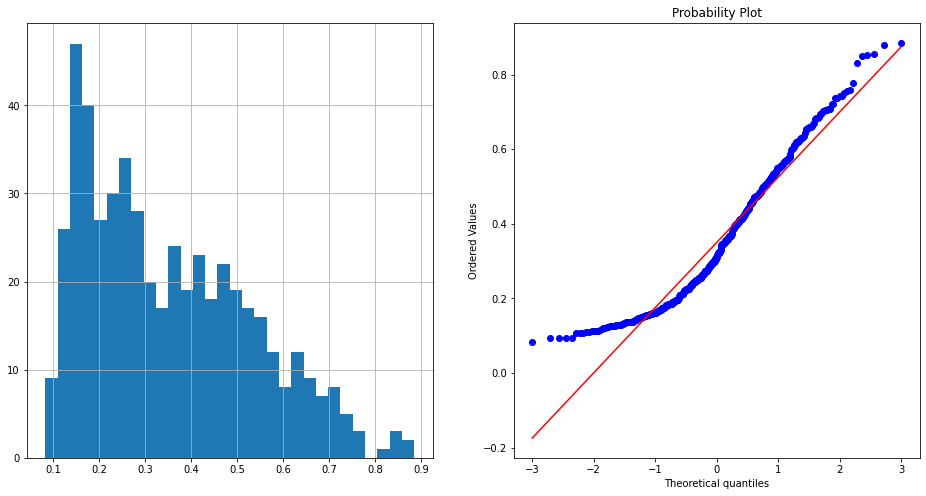

In [30]:
qqp(data, 'dis')

**Square and Cube Root**

In [31]:
data = np.sqrt(df[['lstat', 'nox', 'dis', 'rm']])

data_c = np.cbrt(df[['lstat', 'nox', 'dis', 'rm']])

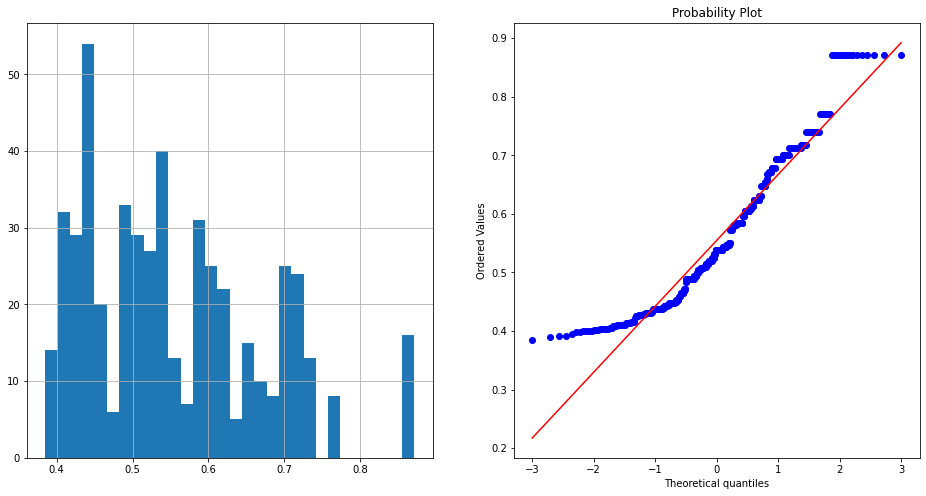

In [35]:
qqp(df, 'nox')

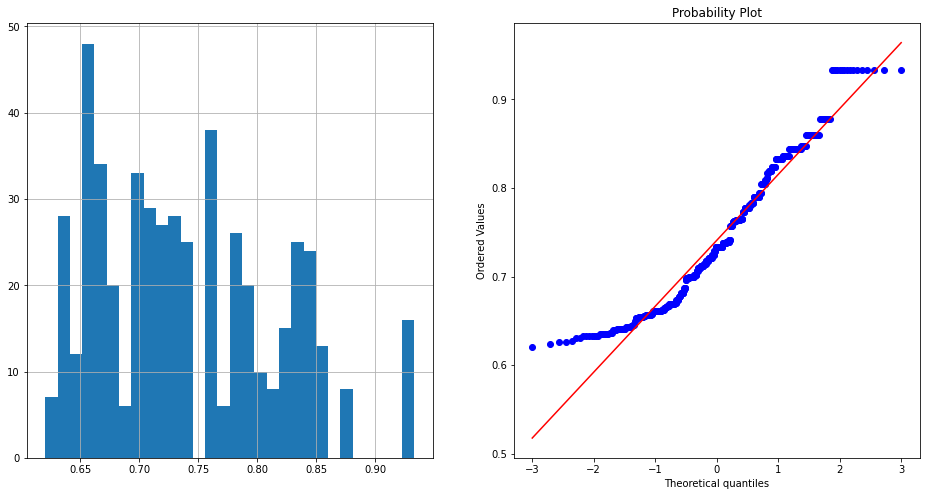

In [36]:
qqp(data, 'nox')

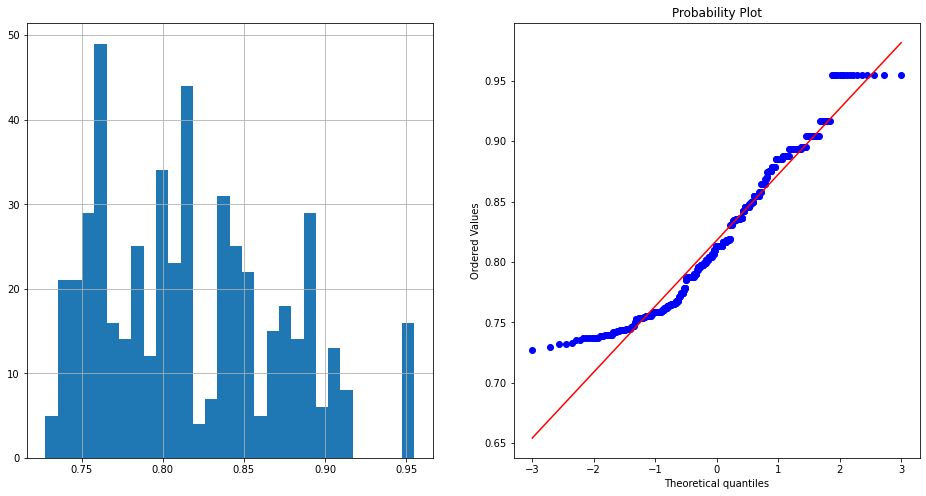

In [37]:
qqp(data_c, 'nox')

In [38]:
# Scikit-learn

data_s = trn.transform(df[['lstat', 'nox', 'dis', 'rm']])

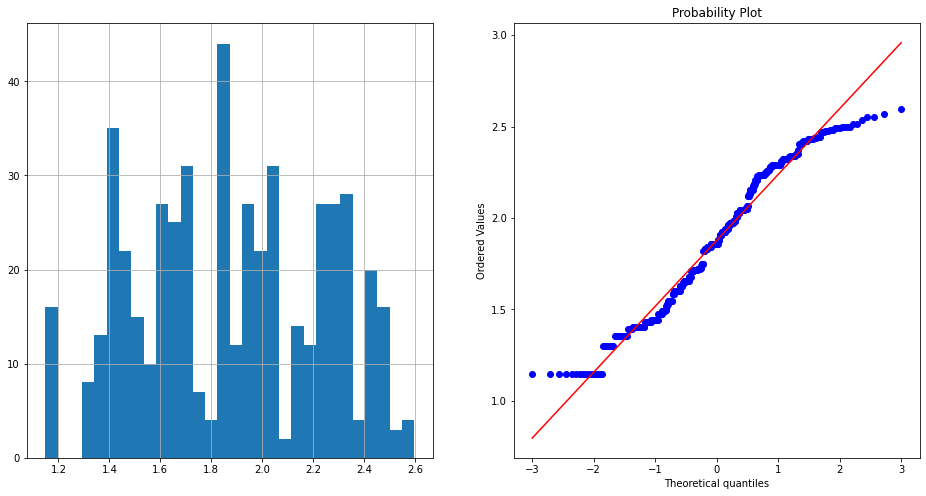

In [39]:
qqp(data_s, 'nox')

**Power Transformations**

In [42]:
data_p = df.copy()
data_p[['lstat', 'nox', 'dis', 'rm']] = np.power(df[['lstat', 'nox', 'dis', 'rm']], 0.3)

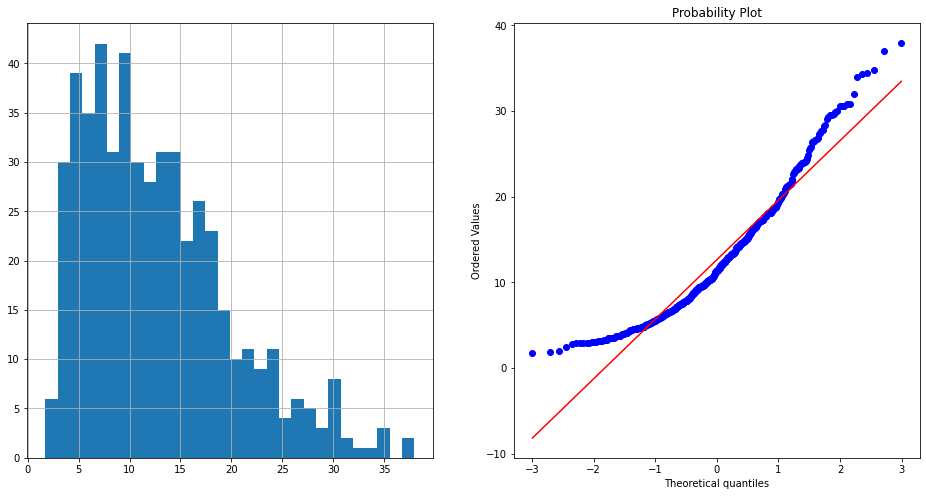

In [43]:
qqp(df, 'lstat')

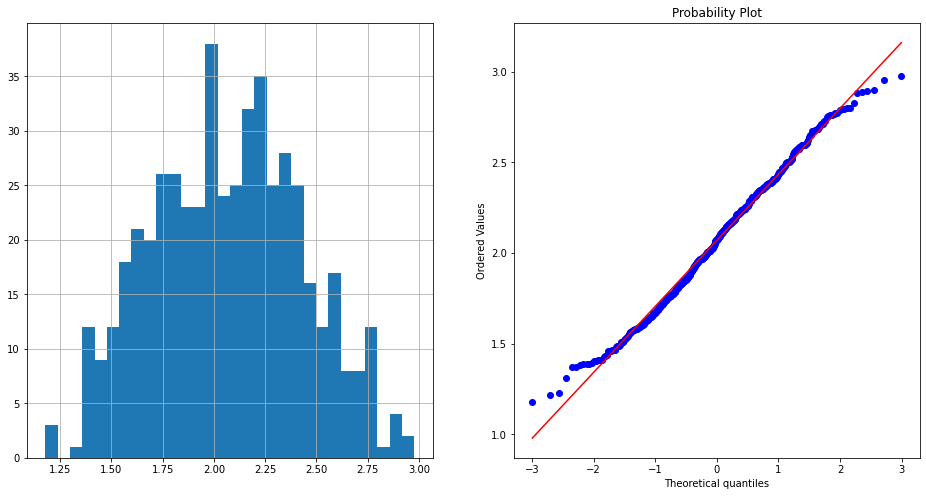

In [44]:
qqp(data_p, 'lstat')

In [45]:
# scikit

trn = FunctionTransformer(lambda x: np.power(x, 0.3))

data_tr = trn.transform(df[['lstat', 'nox', 'dis', 'rm']])

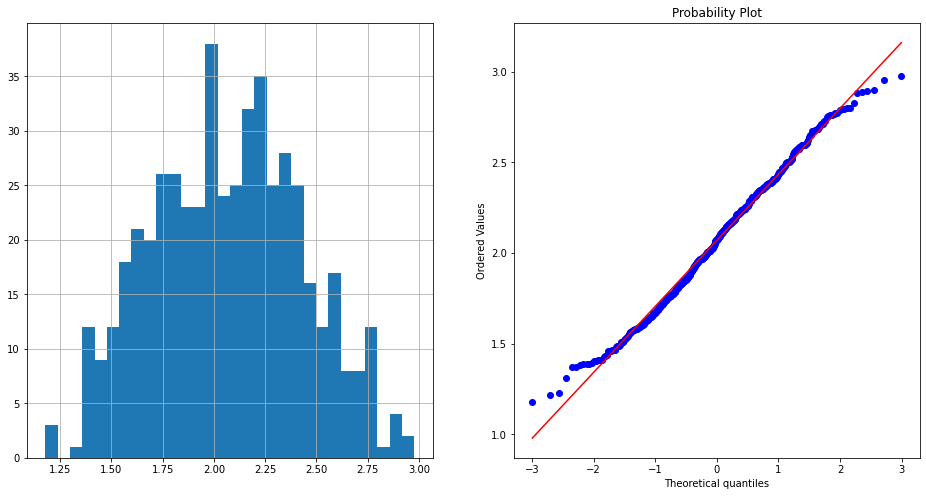

In [46]:
qqp(data_tr, 'lstat')

**Box-Cox Transformation**

In [48]:
data_bc = df.copy()

data_bc['lstat'], param = stats.boxcox(df['lstat'])

In [49]:
print('Optimal λ: ', param)

Optimal λ:  0.22776736893884023


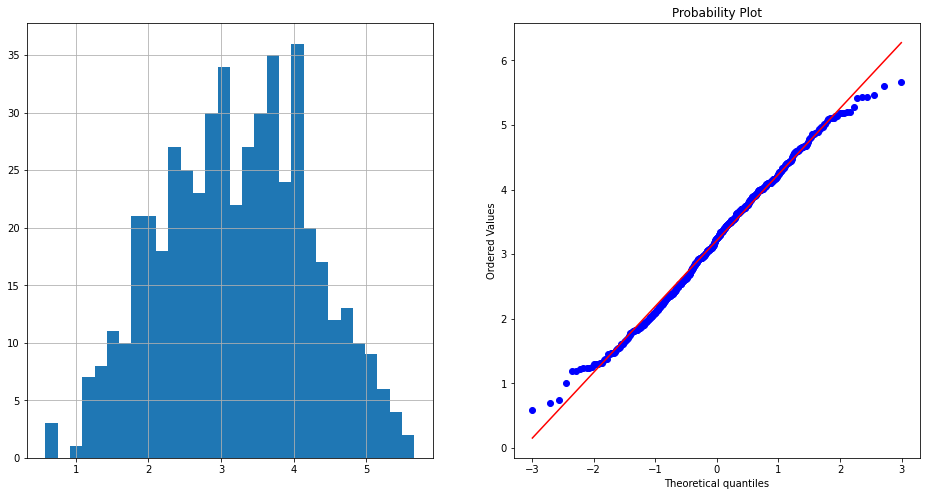

In [50]:
qqp(data_bc, 'lstat')

In [53]:
# sklearn

trn = PowerTransformer(method='box-cox', standardize=False)

cols =['lstat', 'nox', 'dis', 'rm']

trn.fit(df[cols])

PowerTransformer(method='box-cox', standardize=False)

In [54]:
data_tf = trn.transform(df[cols])

In [55]:
trn.lambdas_

array([ 0.22776737, -0.91561209, -0.15560583,  0.44895979])

In [58]:
data_tf = pd.DataFrame(data_tf, columns = cols)

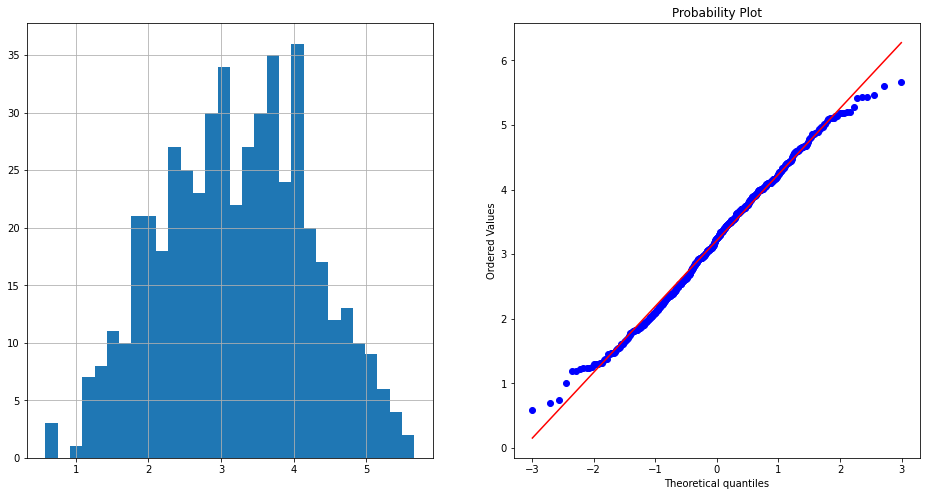

In [59]:
qqp(data_tf, 'lstat')

**Yeo-Johnson**

In [60]:
data_yj = df.copy()

data_yj['lstat'], param = stats.yeojohnson(df['lstat'])

print('Optimal lambda: ', param)

Optimal lambda:  0.15370552301825943


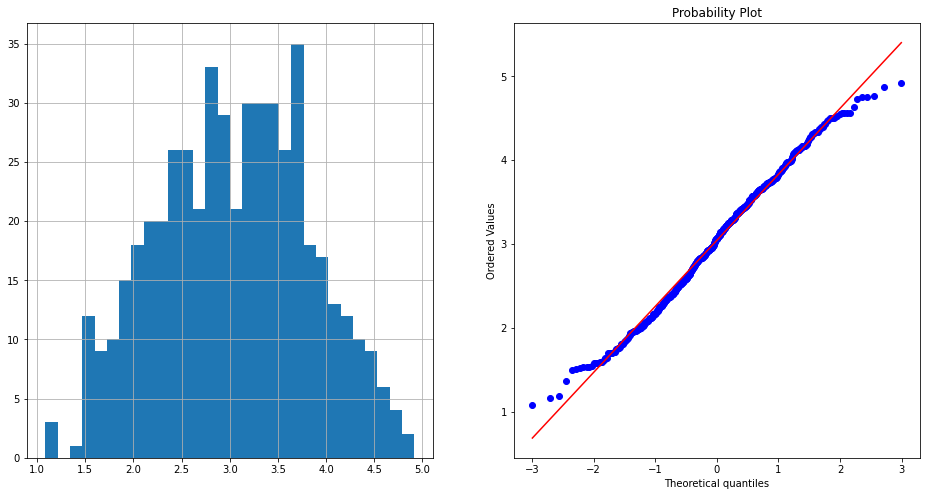

In [61]:
qqp(data_yj, 'lstat')

In [62]:
trn = PowerTransformer(method='yeo-johnson')

trn.fit(df[cols])

PowerTransformer()

In [63]:
data_tf = trn.transform(df[cols])

In [65]:
trn.lambdas_

array([ 0.15370552, -3.97371104, -0.44887192,  0.33298652])